### 과제
- 데이터 셋 : sklearn.learn의 load_diabetes활용
- 학습방법 : 지도학습 > 회귀
- 알고리즘 : KNNRegressor
- 목적 : 복습

In [127]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
# 기본 : DF형태로 변환
# 변환값  : Bunch 객체로 dict와 유사
dataDict  = load_diabetes(as_frame=True)
dataDict .keys()


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [129]:
target = dataDict.target


In [130]:
target

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [131]:
df = dataDict.data

In [132]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [133]:
df['target']=target

In [134]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [135]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [136]:
# bmi와 s5와 상관계수 0.5 후반
# features >> bmi s5
# target >> target

df1 = df[['bmi','s5','target']]

In [137]:
df1

,bmi,s5,target
0,0.061696,0.019907,151.0
1,-0.051474,-0.068332,75.0
2,0.044451,0.002861,141.0
3,-0.011595,0.022688,206.0
4,-0.036385,-0.031988,135.0
...,...,...,...
437,0.019662,0.031193,178.0
438,-0.015906,-0.018114,104.0
439,-0.015906,-0.046883,132.0
440,0.039062,0.044529,220.0


In [138]:
df1.corr()

,bmi,s5,target
bmi,1.000000,0.446157,0.586450
s5,0.446157,1.000000,0.565883
target,0.586450,0.565883,1.000000


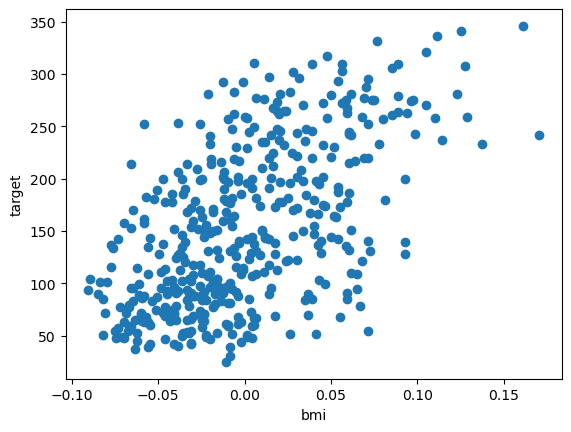

In [139]:
# 시각화
plt.scatter(df1['bmi'], df['target'])
plt.xlabel('bmi')
plt.ylabel('target')
plt.show()

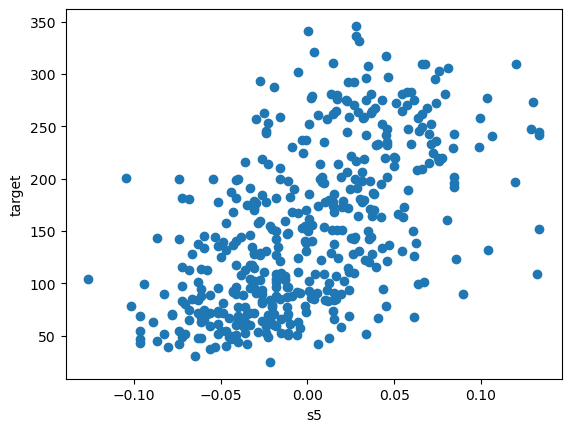

In [140]:
# 시각화
plt.scatter(df1['s5'], df['target'])
plt.xlabel('s5')
plt.ylabel('target')
plt.show()

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
# 2. 학습 준비
features = df1[['bmi', 's5']]
target = df1['target']
print(f'features: {features.shape}, {features.ndim}D')
print(f'target: {target.shape}, {target.ndim}D')

features: (442, 2), 2D
target: (442,), 1D


In [143]:
x_train, x_test, y_train, y_test = train_test_split(features,target,random_state=5)

In [144]:
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [145]:
print(f'x_train: {x_train.shape}, {x_train.ndim}D')
print(f'x_test: {x_test.shape}, {x_test.ndim}D')

print(f'y_train: {y_train.shape}, {y_train.ndim}D')
print(f'y_test: {y_test.shape}, {y_test.ndim}D')


x_train: (331, 2), 2D
x_test: (111, 2), 2D
y_train: (331,), 1D
y_test: (111,), 1D


In [146]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()

# 학습용 데이터셋으로 학습 진행
model.fit(x_train, y_train) 

KNeighborsRegressor()

In [147]:
# 모델 파라미터 => 학습 후 즉, fit() 실행 후 설정되는 매개변수
model.n_features_in_, model.n_samples_fit_, model.effective_metric_,model.effective_metric_params_

(2, 331, 'euclidean', {})

In [148]:
scores={}

for k in range (1, model.n_samples_fit_):
    # 최근접 이웃의 갯수 설정 <== 모델 성능 좌우 : 하이퍼파라미터
    model.n_neighbors =k

    # 성능 평가
    score = model. score(x_test, y_test)
    scores[k] = score

In [149]:
# 최고 성능의 k값
best_k = sorted(scores.items(), key=lambda x:x[1], reverse=True)[0][0]
    #                            x = (key, value)

best_k

23

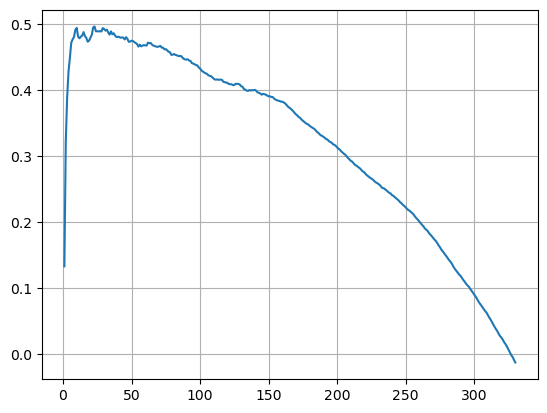

In [150]:
plt.plot(list(scores.keys()),list(scores.values()))
plt.grid()
plt.show()

In [151]:
model.n_neighbors=best_k